# 1. OverView on Price Elasticity
## What is price elasticity?

The foundamental assumption in economics is that people will buy the product or service if it’s cheaper and less will buy it if it’s more expensive. But the phenomenon is more quantifiable than that, and price elasticity shows exactly how responsive customer demand is for a product based on its price. 

## How is it calculated?
Assuming that $Q$ is the quantity of demand for a certain commodity, and $P$ is the price of the commodity. Then the formula for price elasticity of demand:

$E_{d} = \frac{\Delta Q/Q}{\Delta P/P}$

Let’s look at an example. Say that a company raised the price of one of its item from \$100 to \$120. The price increase is $\frac{\$120-\$100}{\$100}$ or 20%. Now let’s say that the increase caused a decrease in the quantity sold from 1,000 items to 900 items. The percentage decrease in demand is -10%. Plugging those numbers into the formula, you’d get a price elasticity of demand of:

$E_{d} = \frac{\Delta Q/Q}{\Delta P/P} = \frac{-100/1000}{20/100} = - 0.5$

## How to interpret price elasticity?

There are four zones of elasticity. Products and services can be:

* $E_{d}=0$：Perfectly Inelastic.

Where the quantity demanded does not change when the price changes. Products in this category are things consumers absolutely need and there are no other options from which to obtain them.

* $-1<|E_{d}|<1$: Inelastic.

Where 1% of changes in price cause small changes in demand (less than 1%). Gasoline is a good example here because most people need it, so even when prices go up, demand doesn’t change greatly. Products with stronger brands tend to be more inelastic.

* $|E_{d}|>1$: Positively Elastic.

Where 1% changes in price cause large increase in quantity demanded. This scenario is highly unlikely.

* $E_{d}< -1$: Negatively Elastic.

Where any very small change in price results in a very large decline in the quantity demanded.



# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 3. Data Loading and Data Preparation
We will load data from csv file to data frame and change the data into a format which will be easy to work with.

## Data Loading

In [2]:
# Data Loading
data = pd.read_csv("Data.csv")
data.head()

,date_week,sku_cde,cost_price,regular_price,regular_volume,promo_price,promo_volume
0,2020-02-09,62875832,68.0,140.0,10.0,NaN,0.0
1,2020-02-09,84630314,180.0,300.0,10.0,NaN,0.0
2,2020-02-09,95208654,26.0,56.0,40.0,NaN,0.0
3,2020-02-09,111708109,80.0,NaN,0.0,109.95,10.0
4,2020-02-16,73267284,94.0,205.0,20.0,NaN,0.0


## Data Cleaning and Processing
Following things we can infer from the dataset:
(1) The dataset has various items (sku_cde). <br>
(2) Data is weakly presented. <br>
(3) There are two types of prices for intems (sku_cde) one with regular price and other with promo price. <br>
(3) Also there are some values missing from data and we will deal with it by later either by removing those rows or replacing them with column mean.

Firstly we will do following things:<br>
(1) The column names are not convenient to work with. So we will change them as following:<br>
- date_week -------> Week
- sku_cde ---------> ItemID
- cost_price ------> CostPrice
- regular_price ---> RegularPrice
- regular_volume --> RegularVolume
- promo_price -----> PromoPrice
- promo_volume ----> PromoVolume <br>

In [3]:
# Making sku_cde first column
columns_titles = ["sku_cde","date_week","cost_price","regular_price","regular_volume","promo_price","promo_volume"]
df = data[columns_titles]

# Renaming columns
renamedic = {"sku_cde":"ItemID", "date_week":"Week", "cost_price":"CostPrice", "regular_price":"RegularPrice", "regular_volume":"RegularVolume", "promo_price":"PromoPrice", "promo_volume":"PromoVolume"}
df.rename(columns = renamedic, inplace = True)

# Changing Data Type of ItemID culumn
df["ItemID"] = df["ItemID"].astype("string")

# Rebaming Item Names from ItemID Column
itemList = list(np.unique(df["ItemID"]))
itemDic = {}
index = 1
for item in itemList:
    value = "Id" + str(index)
    itemDic[item] = value
    index += 1
df = df.replace({"ItemID": itemDic})

# Sorting values by ItemID
df = df.sort_values(by=["ItemID"])
df.head()

,ItemID,Week,CostPrice,RegularPrice,RegularVolume,PromoPrice,PromoVolume
332,Id1,2020-11-29,95.0,150.0,40.0,NaN,0.0
268,Id1,2020-10-11,95.0,NaN,0.0,139.95,470.0
639,Id1,2021-08-15,94.0,150.0,100.0,125.00,290.0
283,Id1,2020-10-18,95.0,150.0,140.0,139.95,20.0
631,Id1,2021-08-08,94.0,150.0,40.0,125.00,450.0


In [4]:
itemDic

{'111708109': 'Id1',
 '11990782': 'Id2',
 '12062063': 'Id3',
 '130680236': 'Id4',
 '137353695': 'Id5',
 '62875832': 'Id6',
 '73267284': 'Id7',
 '84630314': 'Id8',
 '95208654': 'Id9'}

The "sku_cde"s are not convinient to work with. we will replace the "sku_cde"'s as above.

Now We will Split the DataFrame for "RegularPrices" and "PromoPrice" in to two data Frames

In [5]:
regularDF = df[["ItemID", "Week", "CostPrice", "RegularPrice", "RegularVolume"]]
regularDF.rename(columns = {"RegularPrice":"Price", "RegularVolume":"Volume"}, inplace = True)
regularDF.head()

/tmp/ipykernel_3617939/3464994756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regularDF.rename(columns = {"RegularPrice":"Price", "RegularVolume":"Volume"}, inplace = True)


,ItemID,Week,CostPrice,Price,Volume
332,Id1,2020-11-29,95.0,150.0,40.0
268,Id1,2020-10-11,95.0,NaN,0.0
639,Id1,2021-08-15,94.0,150.0,100.0
283,Id1,2020-10-18,95.0,150.0,140.0
631,Id1,2021-08-08,94.0,150.0,40.0


In [6]:
promoDF = df[["ItemID", "Week", "CostPrice", "PromoPrice", "PromoVolume"]]
promoDF.rename(columns = {"PromoPrice":"Price", "PromoVolume":"Volume"}, inplace = True)
promoDF.head()

/tmp/ipykernel_3617939/858748818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoDF.rename(columns = {"PromoPrice":"Price", "PromoVolume":"Volume"}, inplace = True)


,ItemID,Week,CostPrice,Price,Volume
332,Id1,2020-11-29,95.0,NaN,0.0
268,Id1,2020-10-11,95.0,139.95,470.0
639,Id1,2021-08-15,94.0,125.00,290.0
283,Id1,2020-10-18,95.0,139.95,20.0
631,Id1,2021-08-08,94.0,125.00,450.0


Now We Will check for "Null" and "NAN" Values in both data frames 

In [7]:
regularDF.isnull().sum()

ItemID         0
Week           0
CostPrice      0
Price        166
Volume         0
dtype: int64

In [8]:
promoDF.isnull().sum()

ItemID         0
Week           0
CostPrice      0
Price        604
Volume         0
dtype: int64

As we can see there are some "Null" values in both dataframes. We have sufficient data So we will remove the rows containing "Null" Values.

In [9]:
regularDF = regularDF.dropna()
regularDF.head()

,ItemID,Week,CostPrice,Price,Volume
332,Id1,2020-11-29,95.0,150.0,40.0
639,Id1,2021-08-15,94.0,150.0,100.0
283,Id1,2020-10-18,95.0,150.0,140.0
631,Id1,2021-08-08,94.0,150.0,40.0
291,Id1,2020-10-25,95.0,150.0,100.0


In [10]:
promoDF = promoDF.dropna()
promoDF.head()

,ItemID,Week,CostPrice,Price,Volume
268,Id1,2020-10-11,95.0,139.95,470.0
639,Id1,2021-08-15,94.0,125.00,290.0
283,Id1,2020-10-18,95.0,139.95,20.0
631,Id1,2021-08-08,94.0,125.00,450.0
624,Id1,2021-08-01,94.0,125.00,860.0


Now We have Clean data As Two data Frames, One for Regular Prices and other for promo prices. We will Save This data in CSV Files in "CleanedData" folder.

In [11]:
regularDF.to_csv('CleanedData/RegularData.csv')
promoDF.to_csv('CleanedData/PromoData.csv')

# 4. Eploratory Data Analysis
Now we will do some exploratory data analysys to understand data.

Fist We will use ".descibe()" function to understand data

In [12]:
regularDF.describe()

,CostPrice,Price,Volume
count,685.000000,685.000000,685.000000
mean,94.781022,184.426277,135.897810
std,43.240304,71.458772,109.281096
min,14.000000,50.000000,10.000000
25%,74.000000,140.000000,50.000000
50%,92.000000,190.000000,110.000000
75%,99.000000,205.000000,200.000000
max,210.000000,330.000000,620.000000


In [13]:
promoDF.describe()

,CostPrice,Price,Volume
count,247.000000,247.000000,247.000000
mean,93.255061,152.039271,310.850202
std,38.993064,58.689836,317.114284
min,26.000000,36.950000,10.000000
25%,80.000000,125.000000,100.000000
50%,92.000000,149.950000,220.000000
75%,96.000000,169.960000,420.000000
max,210.000000,299.950000,2610.000000


## Data Visualization For Individual Items
Now We will see how data looks like using some plots

### Data Visualization for ItemID=Id1
Lest See Data for only one item. For this we will use "ItemID=Id1"

In [14]:
item = "Id1"

#### Regular Price Data

In [15]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
332,Id1,2020-11-29,95.0,150.0,40.0
639,Id1,2021-08-15,94.0,150.0,100.0
283,Id1,2020-10-18,95.0,150.0,140.0
631,Id1,2021-08-08,94.0,150.0,40.0
291,Id1,2020-10-25,95.0,150.0,100.0


In [16]:
np.unique(itemDF["Price"])

array([135., 147., 150., 170., 185.])

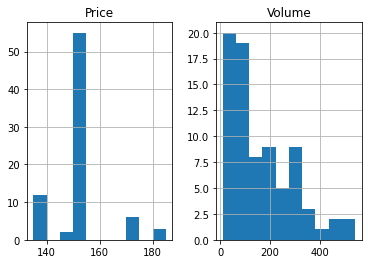

In [17]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

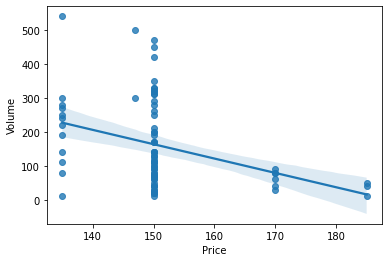

In [18]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [19]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
268,Id1,2020-10-11,95.0,139.95,470.0
639,Id1,2021-08-15,94.0,125.00,290.0
283,Id1,2020-10-18,95.0,139.95,20.0
631,Id1,2021-08-08,94.0,125.00,450.0
624,Id1,2021-08-01,94.0,125.00,860.0


In [20]:
np.unique(itemDF["Price"])

array([104.95, 109.95, 119.95, 125.  , 139.95, 144.95])

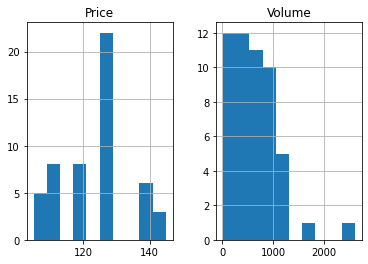

In [21]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

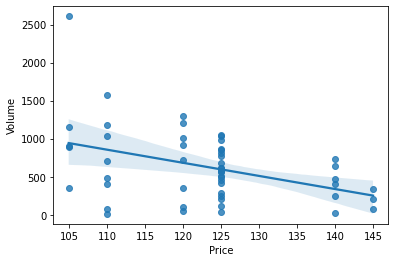

In [22]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id2
Lest See Data for only one item. For this we will use "ItemID=Id2"

In [23]:
item = "Id2"

#### Regular Price Data

In [24]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
521,Id2,2021-05-09,91.0,190.0,110.0
467,Id2,2021-03-28,91.0,190.0,70.0
447,Id2,2021-03-07,91.0,190.0,170.0
453,Id2,2021-03-14,91.0,190.0,80.0
233,Id2,2020-09-06,91.0,180.0,220.0


In [25]:
np.unique(itemDF["Price"])

array([180., 190., 200.])

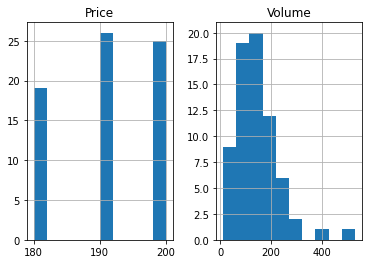

In [26]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

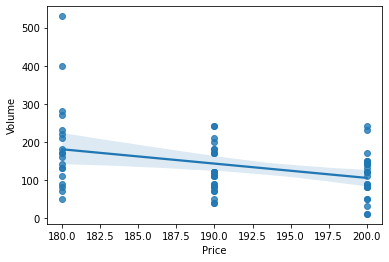

In [27]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [28]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
200,Id2,2020-08-09,91.0,149.95,170.0
689,Id2,2021-09-26,91.0,169.95,170.0
174,Id2,2020-07-19,91.0,149.95,350.0
696,Id2,2021-10-03,91.0,169.95,280.0
179,Id2,2020-07-26,91.0,149.95,410.0


In [29]:
np.unique(itemDF["Price"])

array([149.95, 154.95, 159.95, 169.95, 169.96])

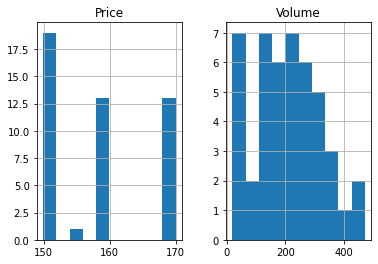

In [30]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

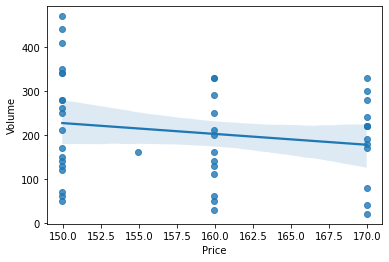

In [31]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id3
Lest See Data for only one item. For this we will use "ItemID=Id3"

In [32]:
item = "Id3"

#### Regular Price Data

In [33]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
527,Id3,2021-05-16,99.0,200.0,140.0
418,Id3,2021-02-14,99.0,200.0,90.0
537,Id3,2021-05-23,99.0,200.0,200.0
644,Id3,2021-08-22,99.0,205.0,230.0
613,Id3,2021-07-25,99.0,205.0,260.0


In [34]:
np.unique(itemDF["Price"])

array([200., 205., 210.])

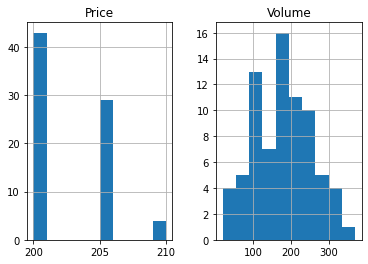

In [35]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

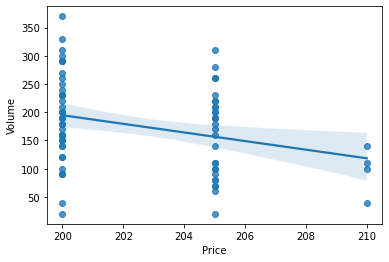

In [36]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [37]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
113,Id3,2020-05-31,95.0,159.95,390.0
28,Id3,2020-03-08,70.0,149.95,380.0
418,Id3,2021-02-14,99.0,169.95,70.0
108,Id3,2020-05-24,95.0,159.95,200.0
434,Id3,2021-02-28,99.0,169.95,280.0


In [38]:
np.unique(itemDF["Price"])

array([149.95, 154.95, 159.95, 169.95, 174.95, 179.95])

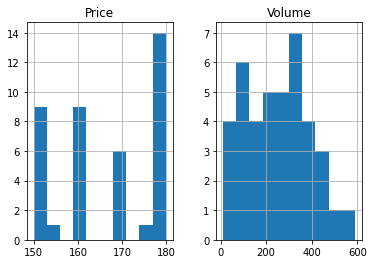

In [39]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

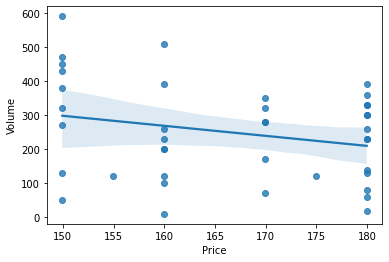

In [40]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id4
Lest See Data for only one item. For this we will use "ItemID=Id4"

In [41]:
item = "Id4"

#### Regular Price Data

In [42]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
481,Id4,2021-04-04,105.0,230.0,20.0
161,Id4,2020-07-12,105.0,220.0,20.0
840,Id4,2022-02-06,110.0,240.0,40.0
186,Id4,2020-07-26,105.0,220.0,30.0
811,Id4,2022-01-16,110.0,240.0,10.0


In [43]:
np.unique(itemDF["Price"])

array([220., 230., 240.])

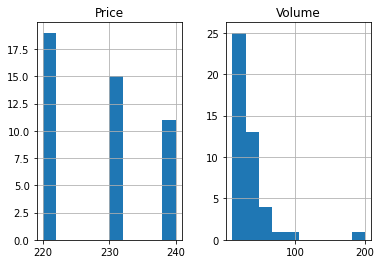

In [44]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

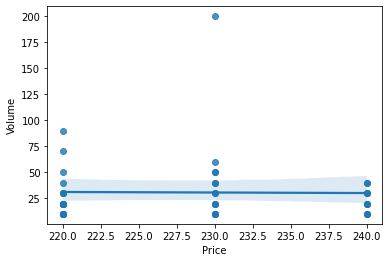

In [45]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [46]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
553,Id4,2021-06-06,105.0,209.95,10.0
570,Id4,2021-06-20,105.0,209.95,50.0
560,Id4,2021-06-13,105.0,209.95,10.0


In [47]:
np.unique(itemDF["Price"])

array([209.95])

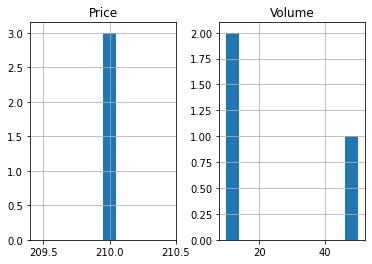

In [48]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

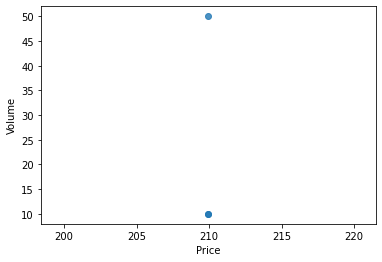

In [49]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id5
Lest See Data for only one item. For this we will use "ItemID=Id5"

In [50]:
item = "Id5"

#### Regular Price Data

In [51]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
558,Id5,2021-06-06,84.0,200.0,30.0
488,Id5,2021-04-11,84.0,190.0,50.0
509,Id5,2021-05-02,84.0,190.0,40.0
399,Id5,2021-01-24,84.0,190.0,140.0
440,Id5,2021-03-07,84.0,190.0,40.0


In [52]:
np.unique(itemDF["Price"])

array([180., 190., 200.])

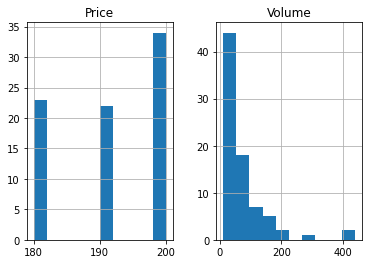

In [53]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

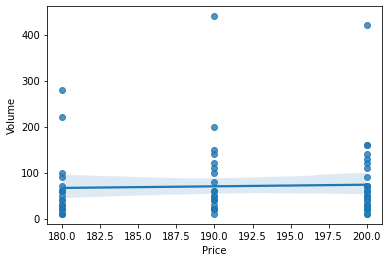

In [54]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [55]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
558,Id5,2021-06-06,84.0,169.95,20.0
535,Id5,2021-05-23,84.0,169.95,60.0
526,Id5,2021-05-16,84.0,169.95,40.0
543,Id5,2021-05-30,84.0,169.95,70.0
228,Id5,2020-09-06,84.0,169.95,70.0


In [56]:
np.unique(itemDF["Price"])

array([169.95])

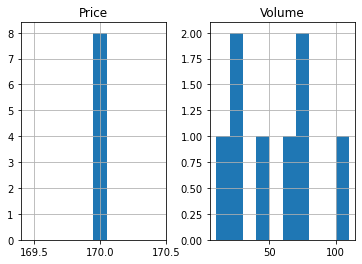

In [57]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

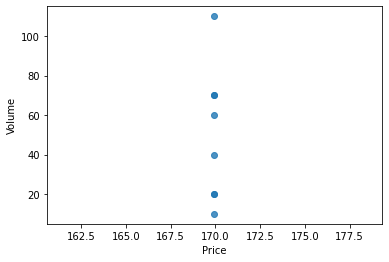

In [58]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id6
Lest See Data for only one item. For this we will use "ItemID=Id6"

In [59]:
item = "Id6"

#### Regular Price Data

In [60]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
795,Id6,2022-01-02,77.0,140.0,80.0
682,Id6,2021-09-19,73.0,140.0,170.0
731,Id6,2021-11-07,75.0,140.0,150.0
684,Id6,2021-09-26,73.0,140.0,100.0
710,Id6,2021-10-17,73.0,140.0,130.0


In [61]:
np.unique(itemDF["Price"])

array([140.])

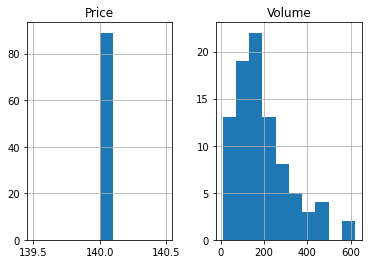

In [62]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

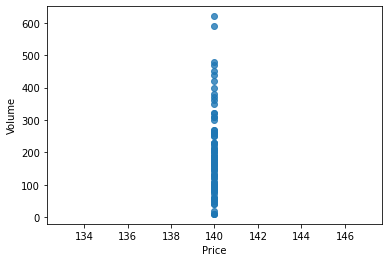

In [63]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [64]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
762,Id6,2021-12-05,77.0,129.95,470.0
753,Id6,2021-11-28,76.0,129.95,500.0
770,Id6,2021-12-12,77.0,129.95,220.0
748,Id6,2021-11-21,76.0,129.95,460.0
738,Id6,2021-11-14,76.0,129.95,180.0


In [65]:
np.unique(itemDF["Price"])

array([119.95, 129.95, 134.95])

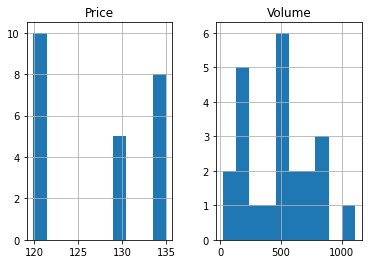

In [66]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

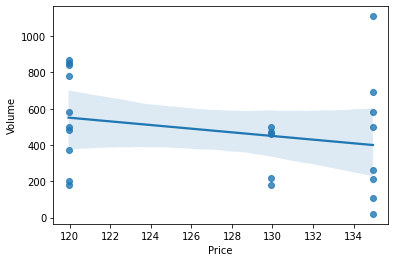

In [67]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id7
Lest See Data for only one item. For this we will use "ItemID=Id7"

In [68]:
item = "Id7"

#### Regular Price Data

In [69]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
311,Id7,2020-11-15,92.0,205.0,40.0
690,Id7,2021-09-26,95.0,216.0,10.0
262,Id7,2020-10-04,92.0,205.0,30.0
256,Id7,2020-09-27,92.0,205.0,40.0
681,Id7,2021-09-19,95.0,216.0,30.0


In [70]:
np.unique(itemDF["Price"])

array([205., 216.])

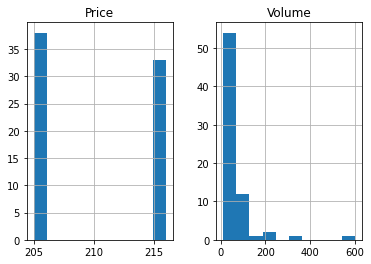

In [71]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

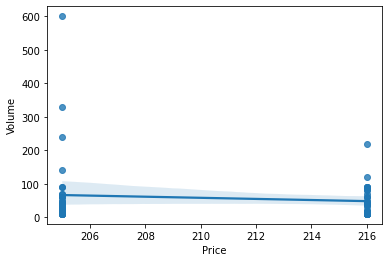

In [72]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [73]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
615,Id7,2021-07-25,95.0,199.95,90.0
210,Id7,2020-08-16,92.0,179.95,60.0
619,Id7,2021-08-01,95.0,199.95,10.0
221,Id7,2020-08-30,92.0,189.95,40.0
229,Id7,2020-09-06,92.0,189.95,40.0


In [74]:
np.unique(itemDF["Price"])

array([169.95, 179.95, 189.95, 197.45, 199.95])

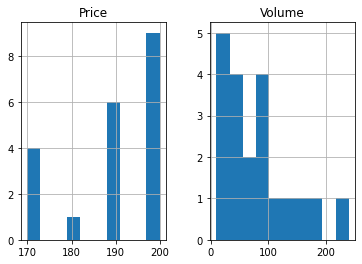

In [75]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

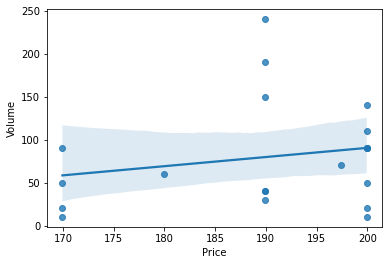

In [76]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id8
Lest See Data for only one item. For this we will use "ItemID=Id8"

In [77]:
item = "Id8"

#### Regular Price Data

In [78]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
419,Id8,2021-02-14,191.0,320.0,180.0
129,Id8,2020-06-14,180.0,300.0,80.0
414,Id8,2021-02-07,191.0,320.0,160.0
541,Id8,2021-05-23,197.0,330.0,230.0
610,Id8,2021-07-25,197.0,330.0,150.0


In [79]:
np.unique(itemDF["Price"])

array([300., 320., 330.])

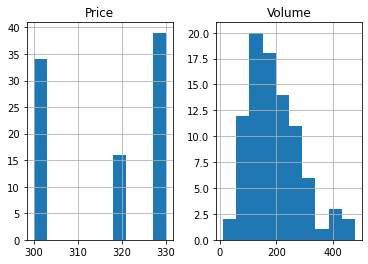

In [80]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

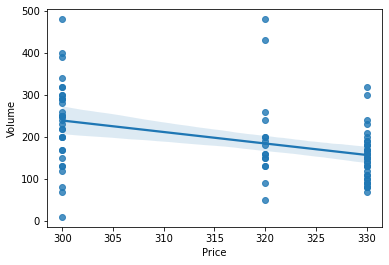

In [81]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [82]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
106,Id8,2020-05-24,180.0,259.95,560.0
129,Id8,2020-06-14,180.0,259.95,160.0
112,Id8,2020-05-31,180.0,259.95,600.0
754,Id8,2021-11-28,210.0,299.95,150.0
122,Id8,2020-06-07,180.0,259.95,440.0


In [83]:
np.unique(itemDF["Price"])

array([249.95, 259.95, 279.95, 286.95, 299.95])

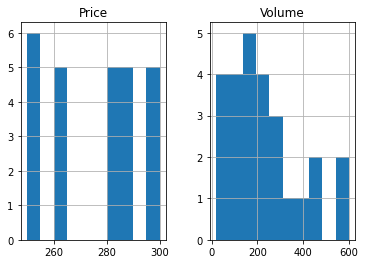

In [84]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

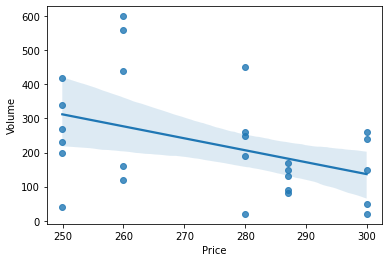

In [85]:
sns.regplot(x="Price", y="Volume", data=itemDF)

### Data Visualization for ItemID=Id9
Lest See Data for only one item. For this we will use "ItemID=Id9"

In [86]:
item = "Id9"

#### Regular Price Data

In [87]:
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
792,Id9,2022-01-02,42.0,60.0,50.0
848,Id9,2022-02-13,42.0,60.0,20.0
5,Id9,2020-02-16,26.0,56.0,200.0
595,Id9,2021-07-11,34.0,63.0,80.0
456,Id9,2021-03-14,32.0,56.0,100.0


In [88]:
np.unique(itemDF["Price"])

array([50., 56., 59., 60., 63.])

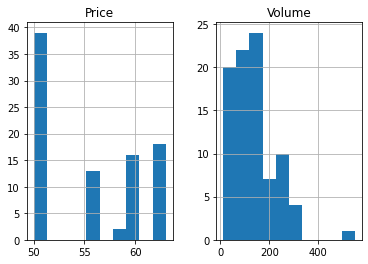

In [89]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

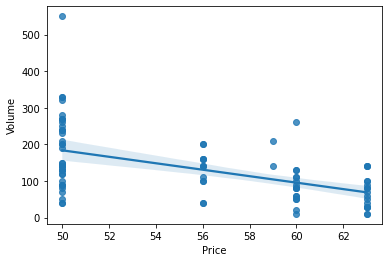

In [90]:
sns.regplot(x="Price", y="Volume", data=itemDF)

#### Promo Price Data

In [91]:
itemDF = promoDF[promoDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
275,Id9,2020-10-11,31.0,44.95,200.0
642,Id9,2021-08-22,34.0,49.95,150.0
58,Id9,2020-04-05,29.0,36.95,170.0
264,Id9,2020-10-04,31.0,44.95,300.0
47,Id9,2020-03-29,29.0,36.95,110.0


In [92]:
np.unique(itemDF["Price"])

array([36.95, 39.95, 39.97, 44.95, 49.95, 57.95, 57.98, 59.63])

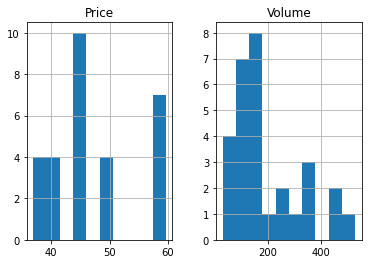

In [93]:
itemDF[["Price","Volume"]].hist()
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Volume'>

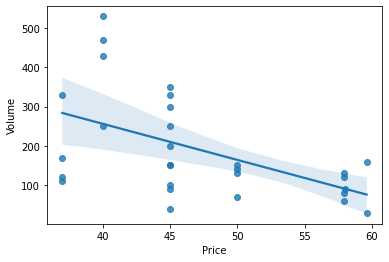

In [94]:
sns.regplot(x="Price", y="Volume", data=itemDF)

## Data Visualization Findings
From Above Item wise data visualization we infer following things.
- In Regular Price data, for "ItemID=I6" We will not be able to build Regression model as it has only one price data point.
- For Promo Price data, for "ItemID=I4,I5" We will not be able to build Regression model as it has only one price data point.
- In Regular and Promo Price data we have outliers. We will keep the outliers as data set is small and the outliers also contribuit to model.

# 5. Model Evaluation and Testing
Now we will build different Regression modesl and evaluate them and we will use the model which gives best fit.

We are using regression models as price and volume is continuous variables.

We will Use "Statsmodels" Library to build models.

We will use following Regression models for testing.<br>
- OLS (Ordinary Least Squares)
- WLS (Weighted Least Squares)
- GLS (Generalized Least Squares)

## OLS Model

### Regular Price Data

In [95]:
Rrsquared = []
Rpvalue = []
Ritemlist = []
for item in list(np.unique(regularDF["ItemID"])):
    if item != "Id6":
        itemDF = regularDF[regularDF["ItemID"]==item]
        x = itemDF["Price"].tolist()
        y = itemDF["Volume"].tolist()
        x = sm.add_constant(x)
        model = sm.OLS(y,x)
        modelResult = model.fit()
        Ritemlist.append(item)
        Rrsquared.append(modelResult.rsquared)
        Rpvalue.append(modelResult.pvalues[0])
    if item == "Id6":
        Ritemlist.append(item)
        Rrsquared.append(np.nan)
        Rpvalue.append(np.nan)
RmodelEval = {"Items": Ritemlist, "RegularPrice R-Squared":Rrsquared, "RegularPrice pValues":Rpvalue}
RmodelEvalDf = pd.DataFrame(RmodelEval)
RmodelEvalDf

,Items,RegularPrice R-Squared,RegularPrice pValues
0,Id1,0.124127,1.006930e-04
1,Id2,0.125910,3.882069e-04
2,Id3,0.087044,4.142145e-03
3,Id4,0.000175,7.554470e-01
4,Id5,0.001440,9.865109e-01
5,Id6,NaN,NaN
6,Id7,0.011474,3.000668e-01
7,Id8,0.163508,2.486223e-06
8,Id9,0.275067,1.726251e-10


### Promo Price Data

In [96]:
Prsquared = []
Ppvalue = []
Pitemlist = []
for item in list(np.unique(promoDF["ItemID"])):
    itemDF = promoDF[promoDF["ItemID"]==item]
    x = itemDF["Price"].tolist()
    y = itemDF["Volume"].tolist()
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    modelResult = model.fit()
    Pitemlist.append(item)
    Prsquared.append(modelResult.rsquared)
    Ppvalue.append(modelResult.pvalues[0])
PmodelEval = {"Items": Pitemlist, "PromoPrice R-Squared":Prsquared, "PromoPrice pValues":Ppvalue}
PmodelEvalDf = pd.DataFrame(PmodelEval)
PmodelEvalDf

,Items,PromoPrice R-Squared,PromoPrice pValues
0,Id1,1.677220e-01,0.000150
1,Id2,3.308478e-02,0.068181
2,Id3,6.240163e-02,0.021728
3,Id4,2.220446e-16,0.222222
4,Id5,-2.220446e-16,0.004120
5,Id6,5.949184e-02,0.129375
6,Id7,4.003835e-02,0.605986
7,Id8,1.714572e-01,0.011234
8,Id9,2.754596e-01,0.000099


## WLS Model

### Regular Price Data

In [97]:
Rrsquared = []
Rpvalue = []
Ritemlist = []
for item in list(np.unique(regularDF["ItemID"])):
    if item != "Id6":
        itemDF = regularDF[regularDF["ItemID"]==item]
        x = itemDF["Price"].tolist()
        y = itemDF["Volume"].tolist()
        x = sm.add_constant(x)
        model = sm.WLS(y,x)
        modelResult = model.fit()
        Ritemlist.append(item)
        Rrsquared.append(modelResult.rsquared)
        Rpvalue.append(modelResult.pvalues[0])
    if item == "Id6":
        Ritemlist.append(item)
        Rrsquared.append(np.nan)
        Rpvalue.append(np.nan)
RmodelEval = {"Items": Ritemlist, "RegularPrice R-Squared":Rrsquared, "RegularPrice pValues":Rpvalue}
RmodelEvalDf = pd.DataFrame(RmodelEval)
RmodelEvalDf

,Items,RegularPrice R-Squared,RegularPrice pValues
0,Id1,0.124127,1.006930e-04
1,Id2,0.125910,3.882069e-04
2,Id3,0.087044,4.142145e-03
3,Id4,0.000175,7.554470e-01
4,Id5,0.001440,9.865109e-01
5,Id6,NaN,NaN
6,Id7,0.011474,3.000668e-01
7,Id8,0.163508,2.486223e-06
8,Id9,0.275067,1.726251e-10


### Promo Price Data

In [98]:
Prsquared = []
Ppvalue = []
Pitemlist = []
for item in list(np.unique(promoDF["ItemID"])):
    itemDF = promoDF[promoDF["ItemID"]==item]
    x = itemDF["Price"].tolist()
    y = itemDF["Volume"].tolist()
    x = sm.add_constant(x)
    model = sm.WLS(y,x)
    modelResult = model.fit()
    Pitemlist.append(item)
    Prsquared.append(modelResult.rsquared)
    Ppvalue.append(modelResult.pvalues[0])
PmodelEval = {"Items": Pitemlist, "PromoPrice R-Squared":Prsquared, "PromoPrice pValues":Ppvalue}
PmodelEvalDf = pd.DataFrame(PmodelEval)
PmodelEvalDf

,Items,PromoPrice R-Squared,PromoPrice pValues
0,Id1,1.677220e-01,0.000150
1,Id2,3.308478e-02,0.068181
2,Id3,6.240163e-02,0.021728
3,Id4,2.220446e-16,0.222222
4,Id5,-2.220446e-16,0.004120
5,Id6,5.949184e-02,0.129375
6,Id7,4.003835e-02,0.605986
7,Id8,1.714572e-01,0.011234
8,Id9,2.754596e-01,0.000099


## GLS Model

### Regular Price Data

In [99]:
Rrsquared = []
Rpvalue = []
Ritemlist = []
for item in list(np.unique(regularDF["ItemID"])):
    if item != "Id6":
        itemDF = regularDF[regularDF["ItemID"]==item]
        x = itemDF["Price"].tolist()
        y = itemDF["Volume"].tolist()
        x = sm.add_constant(x)
        model = sm.GLS(y,x)
        modelResult = model.fit()
        Ritemlist.append(item)
        Rrsquared.append(modelResult.rsquared)
        Rpvalue.append(modelResult.pvalues[0])
    if item == "Id6":
        Ritemlist.append(item)
        Rrsquared.append(np.nan)
        Rpvalue.append(np.nan)
RmodelEval = {"Items": Ritemlist, "RegularPrice R-Squared":Rrsquared, "RegularPrice pValues":Rpvalue}
RmodelEvalDf = pd.DataFrame(RmodelEval)
RmodelEvalDf

,Items,RegularPrice R-Squared,RegularPrice pValues
0,Id1,0.124127,1.006930e-04
1,Id2,0.125910,3.882069e-04
2,Id3,0.087044,4.142145e-03
3,Id4,0.000175,7.554470e-01
4,Id5,0.001440,9.865109e-01
5,Id6,NaN,NaN
6,Id7,0.011474,3.000668e-01
7,Id8,0.163508,2.486223e-06
8,Id9,0.275067,1.726251e-10


### Promo Price Data

In [100]:
Prsquared = []
Ppvalue = []
Pitemlist = []
for item in list(np.unique(promoDF["ItemID"])):
    itemDF = promoDF[promoDF["ItemID"]==item]
    x = itemDF["Price"].tolist()
    y = itemDF["Volume"].tolist()
    x = sm.add_constant(x)
    model = sm.GLS(y,x)
    modelResult = model.fit()
    Pitemlist.append(item)
    Prsquared.append(modelResult.rsquared)
    Ppvalue.append(modelResult.pvalues[0])
PmodelEval = {"Items": Pitemlist, "PromoPrice R-Squared":Prsquared, "PromoPrice pValues":Ppvalue}
PmodelEvalDf = pd.DataFrame(PmodelEval)
PmodelEvalDf

,Items,PromoPrice R-Squared,PromoPrice pValues
0,Id1,1.677220e-01,0.000150
1,Id2,3.308478e-02,0.068181
2,Id3,6.240163e-02,0.021728
3,Id4,2.220446e-16,0.222222
4,Id5,-2.220446e-16,0.004120
5,Id6,5.949184e-02,0.129375
6,Id7,4.003835e-02,0.605986
7,Id8,1.714572e-01,0.011234
8,Id9,2.754596e-01,0.000099


## Model Evaluation Inferences
From Model Evaluation we infer following points.
- The All model did no perform very well for the given data. This could be because of small anount of data available. Also another reason coulld be as we are trying to predic demand based on only prices but demand depend on various factors like "Festive Ocations", "Seasons", "Location" etc.
- However the "pvalues" are in acceptable range and we can reject the "null hypothesis".

We Well use "OLS" model as all models are performing similar. And we want to keep model simple to avoide over fitting.

# 6. Model Building and Price Elaticity Calculation: 
## Elasticity Calculation for Regular Price Data
At the bigining we discussed the formula for "Price Elasticity". We will modify that formula for regression model.

The "Price Elasticity" formula for Regression model is:
$$E_d = slope(Coeficient of regression model) \times \frac{Price Mean}{Volume Mean}$$

In [101]:
item = "Id1"
itemDF = regularDF[regularDF["ItemID"]==item]
itemDF.head()

,ItemID,Week,CostPrice,Price,Volume
332,Id1,2020-11-29,95.0,150.0,40.0
639,Id1,2021-08-15,94.0,150.0,100.0
283,Id1,2020-10-18,95.0,150.0,140.0
631,Id1,2021-08-08,94.0,150.0,40.0
291,Id1,2020-10-25,95.0,150.0,100.0


In [102]:
x = itemDF["Price"].tolist()
y = itemDF["Volume"].tolist()
x = sm.add_constant(x)
model = sm.OLS(y,x)
modelResult = model.fit()
modelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     10.77
Date:                Sat, 08 Oct 2022   Prob (F-statistic):            0.00156
Time:                        21:57:54   Log-Likelihood:                -483.42
No. Observations:                  78   AIC:                             970.8
Df Residuals:                      76   BIC:                             975.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        796.8776    194.111      4.105      0.000     410.272    1183.483
x1            -4.2224      1.287     -3.282      0.002      -6.785      -1.660
==============================================================================
Omnibus:                       11.116   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.495
Skew:                           0.915   Prob(JB):                      0.00319
Kurtosis:                       3.432   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
slope = modelResult.params[1]
print(f"Slope = {slope}")

Slope = -4.222374195019081


In [104]:
pricemean = itemDF["Price"].mean()
volumemean = itemDF["Volume"].mean()
print(f"Price Mean = {pricemean}")
print(f"Volume Mean = {volumemean}")

Price Mean = 150.5
Volume Mean = 161.4102564102564


In [105]:
elasticity = slope * (pricemean/volumemean)
print(f"Price Elasticity = {elasticity}")

Price Elasticity = -3.9369698709554406


### Regular Price Elasticity
for Example We will show price Elasticity calculation for one Item then we will use loop to compute for all

In [106]:
RegularPriceElasticity = []
itemlist = []
for item in list(np.unique(regularDF["ItemID"])):
    if item != "Id6":
        itemDF = regularDF[regularDF["ItemID"]==item]
        x = itemDF["Price"].tolist()
        y = itemDF["Volume"].tolist()
        x = sm.add_constant(x)
        model = sm.OLS(y,x)
        modelResult = model.fit()
        slope = modelResult.params[1]
        pricemean = itemDF["Price"].mean()
        volumemean = itemDF["Volume"].mean()
        elasticity = slope * (pricemean/volumemean)
        itemlist.append(item)
        RegularPriceElasticity.append(elasticity)
    if item == "Id6":
        itemlist.append(item)
        RegularPriceElasticity.append(np.nan)
RElasticityOfDemand = {"Items": itemlist, "Regular Price Elasticity":RegularPriceElasticity}
RegularElasticityOfDemandDf = pd.DataFrame(RElasticityOfDemand)
RegularElasticityOfDemandDf

,Items,Regular Price Elasticity
0,Id1,-3.936970
1,Id2,-5.156805
2,Id3,-8.760572
3,Id4,-0.381939
4,Id5,0.951515
5,Id6,NaN
6,Id7,-5.983689
7,Id8,-4.468611
8,Id9,-3.644798


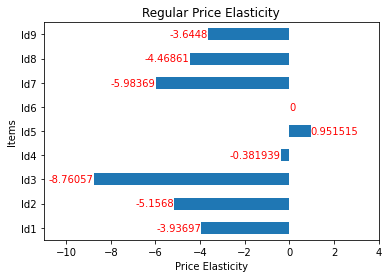

In [107]:
ax = RegularElasticityOfDemandDf.plot(kind="barh", x='Items', y='Regular Price Elasticity', legend=False)
ax.bar_label(ax.containers[0], color="red")
ax.set_xlim(-11,4)
plt.title("Regular Price Elasticity")
plt.xlabel("Price Elasticity")
plt.ylabel("Items")
plt.savefig("RPriceElasticity.pdf")

### promo Price Elasticity

In [108]:
PromoPriceElasticity = []
itemlist = []
for item in list(np.unique(promoDF["ItemID"])):
    if item != "Id4" and item != "Id5":
        itemDF = promoDF[promoDF["ItemID"]==item]
        x = itemDF["Price"].tolist()
        y = itemDF["Volume"].tolist()
        x = sm.add_constant(x)
        model = sm.OLS(y,x)
        modelResult = model.fit()
        slope = modelResult.params[1]
        pricemean = itemDF["Price"].mean()
        volumemean = itemDF["Volume"].mean()
        elasticity = slope * (pricemean/volumemean)
        itemlist.append(item)
        PromoPriceElasticity.append(elasticity)
    else:
        itemlist.append(item)
        PromoPriceElasticity.append(np.nan)
PromoElasticityOfDemand = {"Items": itemlist, "Promo Price Elasticity":PromoPriceElasticity}
PromoElasticityOfDemandDf = pd.DataFrame(PromoElasticityOfDemand)
PromoElasticityOfDemandDf

,Items,Promo Price Elasticity
0,Id1,-3.354475
1,Id2,-1.901496
2,Id3,-1.964864
3,Id4,NaN
4,Id5,NaN
5,Id6,-2.691237
6,Id7,2.544505
7,Id8,-4.250652
8,Id9,-2.263876


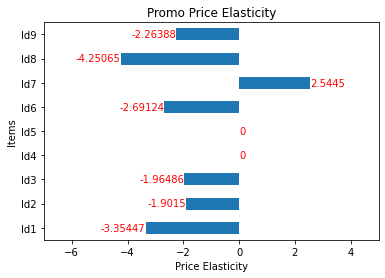

In [109]:
ax = PromoElasticityOfDemandDf.plot(kind="barh", x='Items', y='Promo Price Elasticity', legend=False)
ax.bar_label(ax.containers[0], color="red")
ax.set_xlim(-7,5)
plt.title("Promo Price Elasticity")
plt.xlabel("Price Elasticity")
plt.ylabel("Items")
plt.savefig("PPriceElasticity.pdf")

In [110]:
elasticityDf = pd.concat([RegularElasticityOfDemandDf[["Items", "Regular Price Elasticity"]], PromoElasticityOfDemandDf[["Promo Price Elasticity"]]], axis=1)
elasticityDf

,Items,Regular Price Elasticity,Promo Price Elasticity
0,Id1,-3.936970,-3.354475
1,Id2,-5.156805,-1.901496
2,Id3,-8.760572,-1.964864
3,Id4,-0.381939,NaN
4,Id5,0.951515,NaN
5,Id6,NaN,-2.691237
6,Id7,-5.983689,2.544505
7,Id8,-4.468611,-4.250652
8,Id9,-3.644798,-2.263876


# 7. Final Deliverable

## ItemID="Id1"
### Regular Price Elasticity
- Price Elasticity = -3.97 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 39.7% decrease in demand.
- And 10% decrease in price will cause 39.7% increase in demand. So i'll suggest to decrease the price.<br>
### Promo Price Elasticity
- Price Elasticity = -3.35 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 33.5% decrease in demand.
- And 10% decrease in price will cause 33.5% increase in demand. So i'll suggest to decrease the price.

## ItemID="Id2"
### Regular Price Elasticity
- Price Elasticity = -5.17 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 51.7% decrease in demand.
- And 10% decrease in price will cause 51.7% increase in demand. So i'll suggest to decrease the price.<br>
### Promo Price Elasticity
- Price Elasticity = -1.90 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 19.0% decrease in demand.
- And 10% decrease in price will cause 19.0% increase in demand. So i'll suggest to decrease the price.

## ItemID="Id3"
### Regular Price Elasticity
- Price Elasticity = -8.77 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 87.7% decrease in demand.
- And 10% decrease in price will cause 87.7% increase in demand. So i'll suggest to decrease the price.<br>
### Promo Price Elasticity
- Price Elasticity = -1.96 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 19.6% decrease in demand.
- And 10% decrease in price will cause 19.6% increase in demand. So i'll suggest to decrease the price.

## ItemID="Id4"
### Regular Price Elasticity
- Price Elasticity = -0.38 (Inelastic)
- Price is inelastic to the demand. 10% increase in price will cause 3.8% decrease in demand.
- And 10% decrease in price will cause 3.8% increase in demand. So i'll suggest to increase the price.<br>
### Promo Price Elasticity
- Due to Not enough data points, we could not calculate the price elasticity.

## ItemID="Id5"
### Regular Price Elasticity
- Price Elasticity = 0.95 (Inelastic)
- Price is inelastic to the demand. 10% increase in price will cause 9.5% increase in demand.
- So i'll suggest to increase the price. However Demand is increaeing with price.<br>
### Promo Price Elasticity
- Due to Not enough data points, we could not calculate the price elasticity.

## ItemID="Id6"
### Regular Price Elasticity
- Due to Not enough data points, we could not calculate the price elasticity.<br>
### Promo Price Elasticity
- Price Elasticity = -2.69 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 26.9% decrease in demand.
- And 10% decrease in price will cause 26.9% increase in demand. So i'll suggest to decrease the price.


## ItemID="Id7"
### Regular Price Elasticity
- Price Elasticity = -5.98 (Negatively Elastic)
- Price is inelastic to the demand. 10% increase in price will cause 59.8% decrease in demand.
- And 10% decrease in price will cause 59.8% increase in demand. So i'll suggest to decrease the price.<br>
### Promo Price Elasticity
- Price Elasticity = 2.54 (Positively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 25.4% increase in demand.
- So i'll suggest to increase the price.

## ItemID="Id8"
### Regular Price Elasticity
- Price Elasticity = -4.47 (Negatively Elastic)
- Price is inelastic to the demand. 10% increase in price will cause 44.7% decrease in demand.
- And 10% decrease in price will cause 44.7% increase in demand. So i'll suggest to decrease the price.<br>
### Promo Price Elasticity
- Price Elasticity = -4.25 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 42.5% decrease in demand.
- And 10% decrease in price will cause 42.5% increase in demand. So i'll suggest to decrease the price.

## ItemID="Id9"
### Regular Price Elasticity
- Price Elasticity = -3.64 (Negatively Elastic)
- Price is inelastic to the demand. 10% increase in price will cause 36.4% decrease in demand.
- And 10% decrease in price will cause 36.4% increase in demand. So i'll suggest to decrease the price.<br>
### Promo Price Elasticity
- Price Elasticity = -2.26 (Negatively Elastic)
- Price Is negatively elastic to the demand. 10% increase in price will cause 22.6% decrease in demand.
- And 10% decrease in price will cause 22.6% increase in demand. So i'll suggest to decrease the price.